# Import Statements


In [117]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [119]:
# My laptop does not have NVIDA GeForce GPU so it has to be run on CPU or Azure machines

In [121]:
print("TensorFlow built with CUDA:", tf.test.is_built_with_cuda())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow built with CUDA: False
Num GPUs Available:  0


# Steps
    * Get dataset of small set, and cpu from cudi nvida
    * Proprocess data and resize
    * make nueral network
    * using YOLO method openCV object detection 
    * make first draft of model

# Getting dataset
    * Dataset is from https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
    * 6 classes of material this for first draft of a model
    * make more comments

In [226]:
# Constants
IMAGE_SIZE = (256,256)
# training 50 times first then from there we will see
EPOCHS = 50

    *Merging multiple folders in specific recylce,trash,organic dataset to put in 3 classes
    * used to merge some files that were in subfolders
    * now this code won't work because the glass metal plastic folders are merged and delted

# Generating Image for trash dataset using imageGenerator

In [214]:
"""
trash_dir = 'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash'
augmented_trash_dir = os.path.join(trash_dir, 'augmented')

if not os.path.exists(augmented_trash_dir):
    os.makedirs(augmented_trash_dir)

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment images
for img_name in os.listdir(trash_dir):
    img_path = os.path.join(trash_dir, img_name)
    if not os.path.isfile(img_path):
        continue
    img = load_img(img_path)  # Load image
    x = img_to_array(img)  # Convert image to array
    x = x.reshape((1,) + x.shape)  # Reshape

    # Generate and save augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_trash_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i > 30:  # Generate 20 augmented images per original image
            break;"""


"\ntrash_dir = 'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash'\naugmented_trash_dir = os.path.join(trash_dir, 'augmented')\n\nif not os.path.exists(augmented_trash_dir):\n    os.makedirs(augmented_trash_dir)\n\n# Create an ImageDataGenerator instance\ndatagen = ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest'\n)\n\n# Augment images\nfor img_name in os.listdir(trash_dir):\n    img_path = os.path.join(trash_dir, img_name)\n    if not os.path.isfile(img_path):\n        continue\n    img = load_img(img_path)  # Load image\n    x = img_to_array(img)  # Convert image to array\n    x = x.reshape((1,) + x.shape)  # Reshape\n\n    # Generate and save augmented images\n    i = 0\n    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_trash_dir, save_prefix='aug', save_format='jpeg'):\n        i += 1\n        if i > 30:

In [216]:
# this was used to move the image generateed augmented for trash
"""
source_dirs = [
    'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash/augmented'
    
]

# Destination directory (current folder)
dest_dir = 'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash'

# Move each file from the source directories to the destination directory
for directory in source_dirs:
    for file in os.listdir(directory):
        src_path = os.path.join(directory, file)
        dest_path = os.path.join(dest_dir, file)
        # Check if file already exists in destination to prevent overwriting
        if not os.path.exists(dest_path):
            shutil.move(src_path, dest_path)
"""

"\nsource_dirs = [\n    'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash/augmented'\n    \n]\n\n# Destination directory (current folder)\ndest_dir = 'C:/Users/snehd/Ai-Trash-Recognition/Garbage classification/trash'\n\n# Move each file from the source directories to the destination directory\nfor directory in source_dirs:\n    for file in os.listdir(directory):\n        src_path = os.path.join(directory, file)\n        dest_path = os.path.join(dest_dir, file)\n        # Check if file already exists in destination to prevent overwriting\n        if not os.path.exists(dest_path):\n            shutil.move(src_path, dest_path)\n"

In [218]:
dataset_dir = r"C:\Users\snehd\Ai-Trash-Recognition\Garbage classification"

In [224]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dataset_dir,
    shuffle = True,
    image_size = IMAGE_SIZE,
    batch_size = 32   
)

Found 29393 files belonging to 3 classes.


# Dataset Partition

In [235]:
class_names = dataset.class_names
class_names

['organic', 'recyclable', 'trash']

In [ ]:
len(dataset)

In [ ]:
dataset_size = tf.data.experimental.cardinality(dataset).numpy()
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.1 * dataset_size)


In [ ]:
# Split the dataset
train_dataset = dataset.take(train_size)
remaining = dataset.skip(train_size)
val_dataset = remaining.take(val_size)
test_dataset = remaining.skip(val_size)

In [ ]:
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

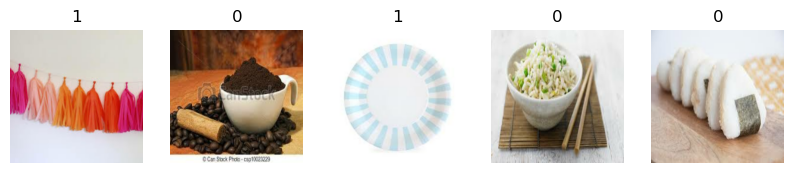

In [189]:
# Function to display a batch of images with labels
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(5):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].numpy().astype("uint8"))
        plt.title(int(label_batch[n]))
        plt.axis("off")

# Get a batch of images and labels
for image_batch, label_batch in dataset.take(1):
    show_batch(image_batch, label_batch)


In [198]:
# Prefetching data for better performance
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


# proprocessing

In [233]:

# This is to make data into numbers between 0-1
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    layers.Rescaling(1.0/255)
])

# Flip random images 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

# CNN Model Building

In [229]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # Add dropout for regularization to avoid overfitting
    layers.Dropout(0.5),  
     # Adjust the number of neurons for the number of classes
    layers.Dense(3, activation='softmax') 
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,087,939 (49.93 MB)

 Trainable params: 13,087,939 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


In [ ]:
# seeing images
import numpy as np
import matplotlib.pyplot as plt

for images_batch, labels_batch in test_dataset.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])


In [ ]:
# This to save the model
model.save(f"../models/{model_version}")


# Creating computer vision: Integrating camera using openCV and saving images as jpg file

In [ ]:
def preprocess_frame(frame, image_size):
    img = cv2.resize(frame, image_size)
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
import cv2
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0
while True:
    ret, frame = cam.read()
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        
        # Load the saved image
        image = cv2.imread(img_name)
        input_img = preprocess_frame(image, IMAGE_SIZE)

        # Make predictions
        predictions = model.predict(input_img)
        predicted_class = class_names[np.argmax(predictions)]
        print(f"{predicted_class}"

cam.release()
cv2.destroyAllWindows()